# Transport of NaNO3 in a sand matrix

## Introduction
### Context
...
### Objectives
We have to determine the breakthrough curve of a knwon step injection of a tracer substance in a column of porous medium.
The tracer is a non-reactive solute, and the column is saturated with water.
The experiment will help us understand the transport properties of the porous medium.


## Theoretical Background
...
### Equations and Models
Trasmittance index:
\begin{equation}
    T = \frac{I}{I_0} = 10^{-e C L}
\end{equation}
where:  

- $T$ is the transmittance index
- $I$ is the intensity of the light passing through the solution
- $I_0$ is the intensity of the light passing through a reference sample (clean water)
- $e$ is the absorption coefficient of the solute
- $C$ is the concentration of the solute in the solution
- $L$ is the length of the optical path through which light passes in the solution
- $C$ is the concentration of the solute in the solution

We can then determine the absorbance
\begin{equation}
    A = \log_{10}\left(\frac{1}{T}\right) = e C L
\end{equation}

In practice the Reference sample is associated to an absorbance of $A=1$, 
by observing the difference in ight intensity, knowing the optical path, we can determine 
the relative concentration of the flowing solution:
\begin{equation}
    \frac{A}{A_{ref}} = \frac{C {eL}}{C_{ref} {eL}} = \frac{C}{C_{ref}}
\end{equation}

## Experimental Setup
### Materials and Instruments
The experimental setup consists of a small column designed for didactic purposes, 
ensuring the experiment can be completed in a reasonable time. 
The column is 19.5 cm high and 1 cm in diameter, filled with spherical quartz of known porosity. 
Water flows through the system using a XXX pump, with the desired flow rate set directly on the pump. 
However, the actual flow rate is reduced by the resistance of the pipes and the porous medium. 
To determine the real flow rate, a scale is used to measure the water collected in a beaker placed at the spectrophotometer's exit.

After exiting the column, the water flow passes through a spectrophotometer that measures its transmittance. 
This value is then compared to the transmittance of a reference sample of clean water to obtain a relative measurement. 
The flow is regulated by three valves, ensuring a continuous flow of either clean water or water mixed with a tracer,
 with only one substance passing through the column at a time. For this experiment, a non-reactive tracer is used, 
 specifically a solution of NaNO3 in water.

The entire experimental setup and data gathering process is controlled using LabVIEW on a computer. 
The spectrophotometer and the scale are connected through serial interfaces, 
and the system is configured to take readings every second.

### Procedure

The procedure is programmed to run automatically using LabVIEW. 
The experiment begins by flowing water through the system for a specified duration of X minutes. 
Following this initial phase, a tracer solution is injected into the flow for 480 seconds. 
After the tracer injection, the flow is switched back to water, and the cycle is set to repeat. 
However, only one complete cycle needs to be observed for this experiment.

During the experiment, the relative transmittance of the flowing solution is continuously monitored and compared to that of clean water.
Additionally, the absorbance is calculated using the Lambert-Beer law within the software.

## A priori Estimation
To initiate the experiment, we needed to establish a flow rate that would allow us to observe the profile within a reasonable time frame. We estimated the breakthrough time of the profile using the pore velocity $v_p$​, which can be calculated as:

\begin{equation}
v_p = \frac{Q}{An}
\end{equation}

where:
- $v_p$ is the pore velocity in m/s
- $Q$ is the unknown flow rate of the water in m3/s
- $A$ is the known cross-sectional area of the column in m2
- $n$ is the porosity of the medium (dimensionless)

The porosity $n$ can be determined using the mass of water in the column:

\begin{equation}
n = \frac{V_w}{V_{\text{total}}} = \frac{m_w/\rho_w}{V_{\text{total}}} = \frac{m_w}{\rho_w V_{\text{total}}}
\end{equation}

We selected a desired pore velocity $v_p$ such that the breakthrough would pass through the column (ignoring the pipes) in 5 minutes:

\begin{equation}
v_p = \frac{L}{t}
\end{equation}

Using this pore velocity, we computed the required flow rate $Q$:

\begin{equation}
Q = v_p An
\end{equation}

This is the actual flow rate we aimed to achieve. To account for the resistance of the system, 
we set a higher flow rate on the pump.

In [117]:
length_column = 19.5
diameter_column = 1
time_before_breakthrough = 5*60 # 5 minutes

required_velocity = length_column / time_before_breakthrough
print(f"Required velocity: {required_velocity} m/s")

Required velocity: 0.065 m/s


In [118]:
flow_area = 3.14 * (diameter_column / 2)**2
column_volume = length_column * flow_area
print(f"Column volume: {column_volume} cm^3")

Column volume: 15.307500000000001 cm^3


### Estimation of the Porosity

#### by Water Mass

In [119]:
water_mass = 6.524 + 0.217 #grams
water_density = 1 #grams/cm^3
water_volume = water_mass / water_density # cm^3
porosity_A = water_volume / column_volume # cm^3/cm^3
print(f"Porosity: {porosity_A:.4f}")

Porosity: 0.4404


#### by Sand Mass

In [120]:
sand_mass = 23.265 #grams
sand_density = 2.7 #grams/cm^3
sand_volume = sand_mass / sand_density # cm^3
porosity_B = 1 - sand_volume / column_volume # cm^3/cm^3
print(f"Porosity: {porosity_B:.4f}")

Porosity: 0.4371


#### By Sand Bulk Density

In [121]:
sand_bulk_density = 1.48 #grams/cm^3
sand_density = 2.7 #grams/cm^3
porosity_C = (sand_density - sand_bulk_density)/sand_density
print(f"Porosity: {porosity_C:.4f}")

Porosity: 0.4519


#### Final Porosity
we consider the average of the 3 estimates

In [122]:
porosity = (porosity_A + porosity_B + porosity_C ) /3
print(f"Average Porosity: {porosity:.4f}")

Average Porosity: 0.4431


### Estimate Flow Rate

In [123]:
real_volume_flow_rate = required_velocity * porosity * flow_area * 60
print(f"Real volume flow rate: {real_volume_flow_rate:.4f} cm^3/min = mL/min")

Real volume flow rate: 1.3566 cm^3/min = mL/min


From this lower limit we choose to set it to $2 \frac{mL}{min}$ considering that the real flow rate qill be lower than the one the pump is trying to impose since the column and the pipes have some resistance!

## Import Experimental Data

In [124]:
filename = 'C:/Users/Simone Pagliuca/Documents/GitHub/Fission-Reactor-Physics/Transport of Radioactive Contaminants/Lab 1 Data/MISURA GRUPPO 2.2 8 aprile 2025.DAT'

time = []
weight = []
transmittance = []

with open(filename, 'r') as file:
    for line in file:
        # Skip empty lines
        if line.strip() == "":
            continue

        # Split the line by whitespace (handles spaces or tabs)
        parts = line.split()

        if len(parts) >= 3:
            time.append(parts[0])
            weight.append(float(parts[1]))
            transmittance.append(float(parts[2]))

# Optional: check the output
print("Time:", time)
print("Weight:", weight)
print("Transmittance:", transmittance)


Time: ['2.22.11', '2.22.12', '2.22.13', '2.22.14', '2.22.15', '2.22.16', '2.22.17', '2.22.18', '2.22.19', '2.22.20', '2.22.21', '2.22.22', '2.22.23', '2.22.24', '2.22.25', '2.22.26', '2.22.27', '2.22.28', '2.22.29', '2.22.30', '2.22.31', '2.22.32', '2.22.33', '2.22.34', '2.22.35', '2.22.36', '2.22.37', '2.22.38', '2.22.39', '2.22.40', '2.22.41', '2.22.42', '2.22.43', '2.22.44', '2.22.45', '2.22.46', '2.22.47', '2.22.48', '2.22.49', '2.22.50', '2.22.51', '2.22.52', '2.22.53', '2.22.54', '2.22.55', '2.22.56', '2.22.57', '2.22.58', '2.22.59', '2.23.00', '2.23.01', '2.23.02', '2.23.03', '2.23.04', '2.23.05', '2.23.06', '2.23.07', '2.23.08', '2.23.09', '2.23.10', '2.23.11', '2.23.12', '2.23.13', '2.23.14', '2.23.15', '2.23.16', '2.23.17', '2.23.18', '2.23.19', '2.23.20', '2.23.21', '2.23.22', '2.23.23', '2.23.24', '2.23.25', '2.23.26', '2.23.27', '2.23.28', '2.23.29', '2.23.30', '2.23.31', '2.23.32', '2.23.33', '2.23.34', '2.23.35', '2.23.36', '2.23.37', '2.23.38', '2.23.39', '2.23.40', '2.

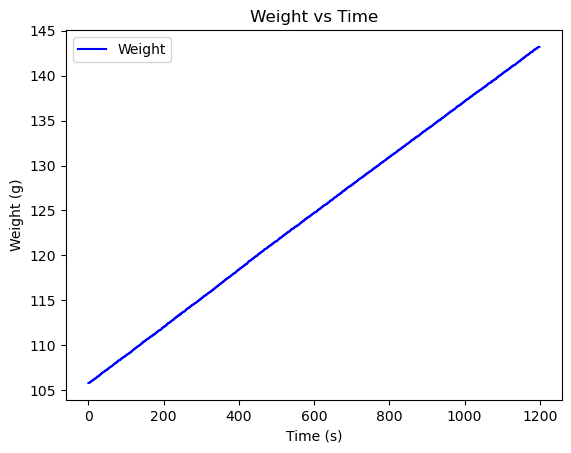

In [125]:
# Plot weight 
import matplotlib.pyplot as plt

plt.plot(weight, label='Weight', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Time')
plt.legend()
plt.show()

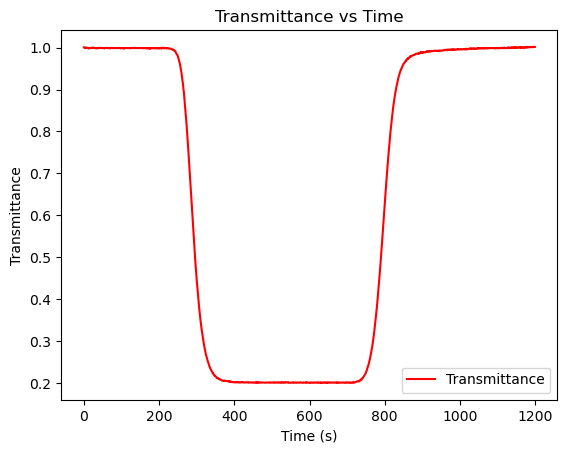

In [126]:
# Plot the transmittance
plt.plot(transmittance, label='Transmittance', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Time')
plt.legend()
plt.show()

### Compute the flow rate

From the scale measurments we see a linear trend so we can simply do the difference between final and initial mass over the time interval

In [127]:
mass_flow_rate = (weight[-1] - weight[0])/len(time)*60
print(f"Mass Flow Rate {mass_flow_rate:.4f} g/min = mL/min = cm^3/min")

Mass Flow Rate 1.8700 g/min = mL/min = cm^3/min


Which is lower then $2.002 mL/min$ that we set on the pump as we expect due to losses by resistences in the loop

### Compute the time of the fluid outside the column

In [152]:
# Total Volume Computation
electrovalves_volume = 150
pipe_in_volume = 0.217 / water_density # = pipe_out and also includes the connectors
out_valve_pipe = 3.14 * (1.02/2)**2 * 150
junction = 3.14 * (1.02/2)**2 * 50
pipe_in_spectrophotometer = 460 # given
cell_volume = 30 # given, volume of the measurment cell
not_column_volume = 2*pipe_in_volume + out_valve_pipe/1e3 + electrovalves_volume/1e3 + junction/1e3 + pipe_in_spectrophotometer/1e3 + cell_volume/1e3
time_not_column = (not_column_volume) / (mass_flow_rate / 60)
print(f"Time of the fluid spent outside the column {time_not_column:.4f}s")


Time of the fluid spent outside the column 39.7008s


### Compute the Velocities from the flow rate

In [129]:
darcy_velocity = mass_flow_rate / (flow_area*60) * 10
print(f"The Darcy Velocity is {darcy_velocity:.4f} mm/s")

The Darcy Velocity is 0.3970 mm/s


In [130]:
pore_velocity = darcy_velocity / porosity
print(f"The Pore Velocity is {pore_velocity:.4f} mm/s")

The Pore Velocity is 0.8960 mm/s


### Detrmine the Breakthrough Curve
We have the trasmittance $T$ and we can compute the absorbance with the following:
\begin{equation}
    A = \log_{10}\left(\frac{1}{T}\right)
\end{equation}

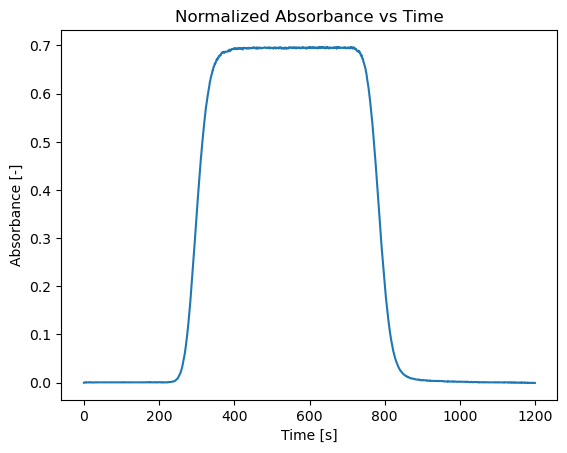

In [131]:
import numpy as np
Absorbance = np.log10(1/np.array(transmittance))
# Plot
plt.plot(Absorbance)
plt.xlabel("Time [s]")
plt.ylabel("Absorbance [-]")
plt.title('Normalized Absorbance vs Time')
plt.show()

We can normalize the curve to get a relative $\frac{C}{C_0}$

In [132]:
# Normalize absorbance == relative concentration
Concentration = Absorbance / max(Absorbance)

Compute the time of arrival by identifing the time at which the curve passes at half reltative concentration $\frac{C}{C_0} = 0.5$ and remove the time spent outside the column

In [153]:
time_breakthorugh = np.argmin(abs(Concentration - 0.5)) - time_not_column
print(f"The breakthough occurs at {time_breakthorugh:.4f}s")

The breakthough occurs at 260.2992s


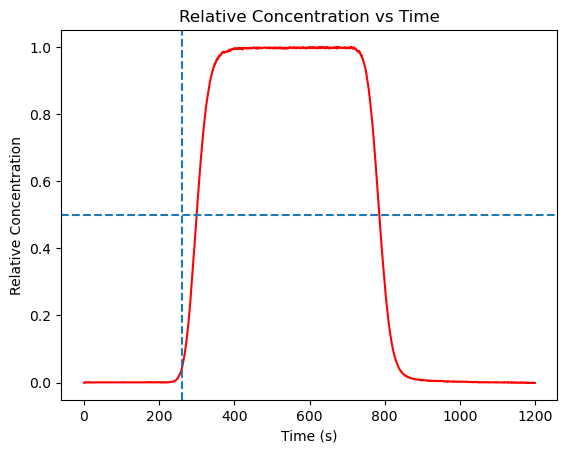

In [154]:

# Plot
plt.plot(Concentration, label='Relative Concentration', color='red')
plt.axhline(0.5, linestyle='--')
plt.axvline(time_breakthorugh, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Relative Concentration')
plt.title('Relative Concentration vs Time')
plt.show()

### Estimate Velocites and porosity from the breakthrough curve